Iteration 100, SSE: 0.0030000000012758094, Theta_0: 1.149998634599735, Theta_1: 0.8300004644025961
Iteration 200, SSE: 0.0030000000001146163, Theta_0: 1.1499995907143594, Theta_1: 0.8300001392070289
Iteration 300, SSE: 0.0030000000000103325, Theta_0: 1.1499998773145577, Theta_1: 0.8300000417280115
Iteration 400, SSE: 0.0030000000000009043, Theta_0: 1.1499999632244178, Theta_1: 0.8300000125081826
Iteration 500, SSE: 0.0030000000000000616, Theta_0: 1.1499999889763337, Theta_1: 0.8300000037493909
Iteration 600, SSE: 0.0030000000000000395, Theta_0: 1.1499999966956005, Theta_1: 0.8300000011238989
Iteration 700, SSE: 0.0029999999999999975, Theta_0: 1.1499999990094891, Theta_1: 0.8300000003368945
Iteration 800, SSE: 0.0029999999999999875, Theta_0: 1.1499999997030894, Theta_1: 0.8300000001009858
Iteration 900, SSE: 0.0029999999999999606, Theta_0: 1.149999999911, Theta_1: 0.8300000000302707
Iteration 1000, SSE: 0.0029999999999999875, Theta_0: 1.149999999973322, Theta_1: 0.8300000000090738

Pred

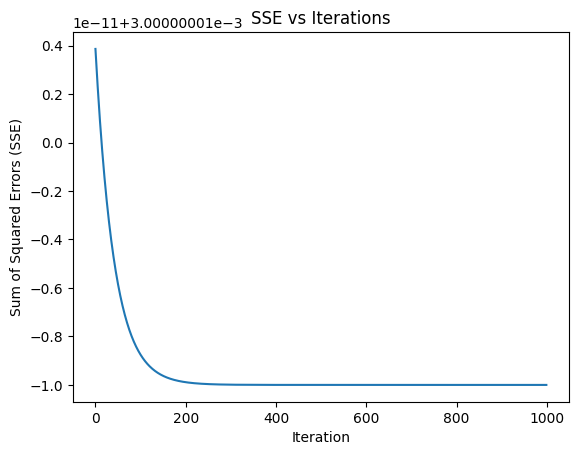

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 3, 4])
y = np.array([2, 2.8, 3.6, 4.5])

# Initial parameters
theta_0 = 1.149995444946768
theta_1 = 0.8300015492735725
alpha = 0.01
num_iterations = 1000
sse_values = []

# Gradient descent
for i in range(num_iterations):
    y_pred = theta_0 + theta_1 * x 
    d_theta_0 = -2 * np.sum(y - y_pred)
    d_theta_1 = -2 * np.sum((y - y_pred) * x) 
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1
    sse = np.sum((y - y_pred) ** 2)
    sse_values.append(sse)
    if (i + 1) % 100 == 0:
        print(f"Iteration {i + 1}, SSE: {sse}, Theta_0: {theta_0}, Theta_1: {theta_1}")

# Predict y for x = 5
x_new = 5
y_new = theta_0 + theta_1 * x_new
print(f"\nPredicted y for x = {x_new}: {y_new}")

# Optional: Plot SSE over iterations
plt.plot(range(num_iterations), sse_values)
plt.xlabel('Iteration')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs Iterations')
plt.show()


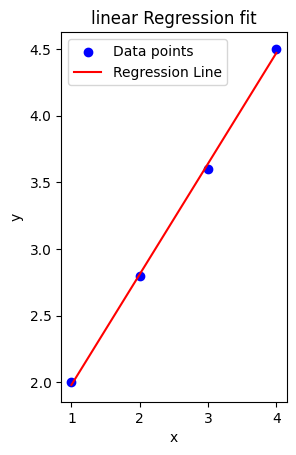

In [12]:
plt.subplot(1,2,2)
plt.scatter(x,y,color = 'blue',label = 'Data points')
plt.plot(x, theta_0 + theta_1*x,color = 'red',label = 'Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear Regression fit')
plt.legend()
plt.show()

In [13]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
data = pd.read_csv("D:/diploma AI/advanced_machine_learning_course_Amit/matriales/Machine_learning/code/Salary_Data.csv")
data.tail()
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Figure size 300x300 with 0 Axes>

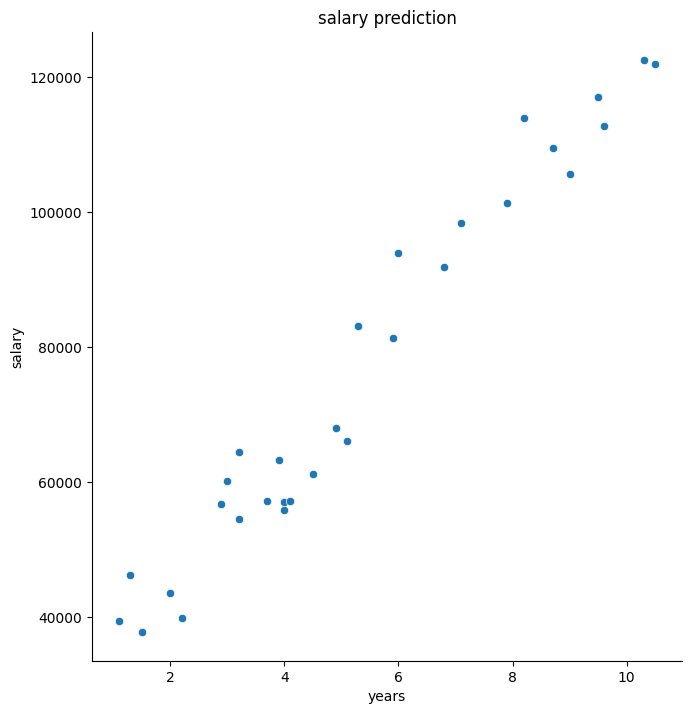

In [14]:
plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()

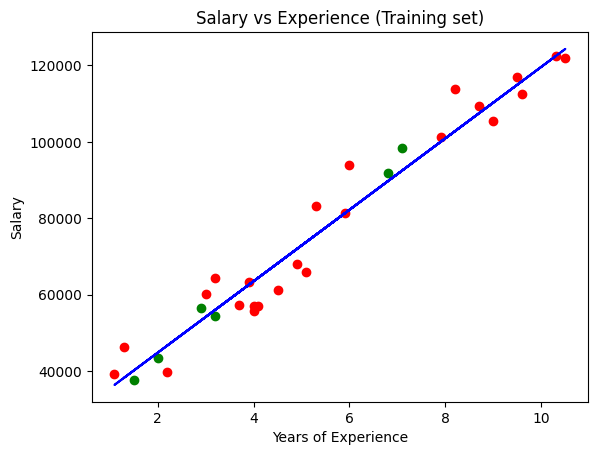

0.9816423482070253

In [15]:
x = data.iloc[:,:-1]
y =data.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=10)
my_model = LinearRegression()
my_model.fit(x_train,y_train)
plt.scatter(x_train, y_train, color = 'red')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_train, my_model.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
my_model.score(x_test, y_test)


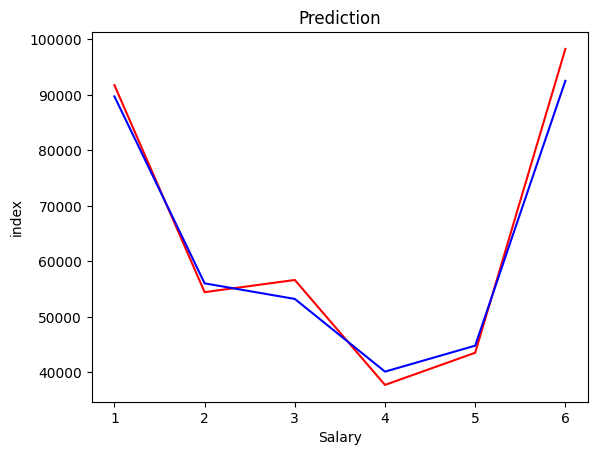

In [16]:
y_pred = my_model.predict(x_test)
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [17]:
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)

Intercept of the model: 26089.096632416724
Coefficient of the line: [9356.86299354]


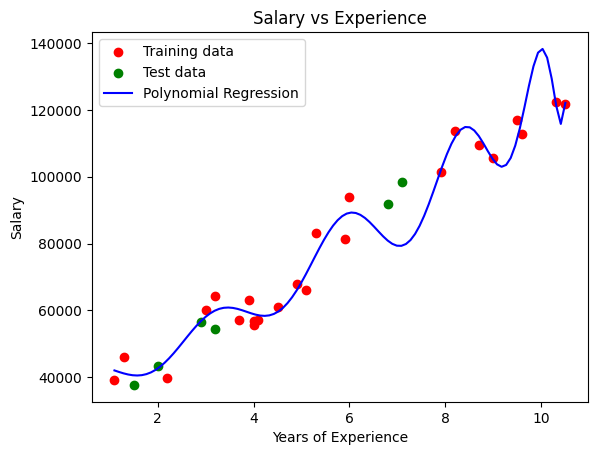

In [18]:
poly = PolynomialFeatures(degree = 15)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train , y_train)
y_poly_perd_train = poly_model.predict(x_poly_train)
y_poly_perd_test = poly_model.predict(x_poly_test)
x_range = np.linspace(x.min(),x.max(), 100).reshape(-1,1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_range, y_range_pred, color='blue', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [19]:
#%%
# calculate Mean square error



y_hat = 9356 * 4.5 +  26089 
print(y_hat)
print('################################################')
print('*\n')

mse = mean_squared_error(y_test, y_poly_perd_test)
rsq = r2_score(y_test, y_poly_perd_test)
print('Mean Squared Error:', mse)
print('R² score:', rsq)

print('Intercept of the model:', poly_model.intercept_)
print('Coefficients of the model:', poly_model.coef_)


y_hat = poly_model.predict(poly.transform([[4.5]]))
print('Predicted Salary for 4.5 years of experience:',y_hat[0])

68191.0
################################################
*

Mean Squared Error: 85806120.99745801
R² score: 0.8390283991003152
Intercept of the model: 44854.87752278645
Coefficients of the model: [ 0.00000000e+00 -2.40709573e+02 -6.15600997e+02 -1.01125489e+03
 -1.08932657e+03 -3.65387638e+02  9.65153667e+02  9.25017759e+02
 -1.39530177e+03  6.93841829e+02 -1.87736763e+02  3.10914271e+01
 -3.24891944e+00  2.09663840e-01 -7.64779152e-03  1.20806733e-04]
Predicted Salary for 4.5 years of experience: 59538.25453241666


Optimized parameters: theta_0 = 0.600000000000003, theta_1 = 0.8000000000000003


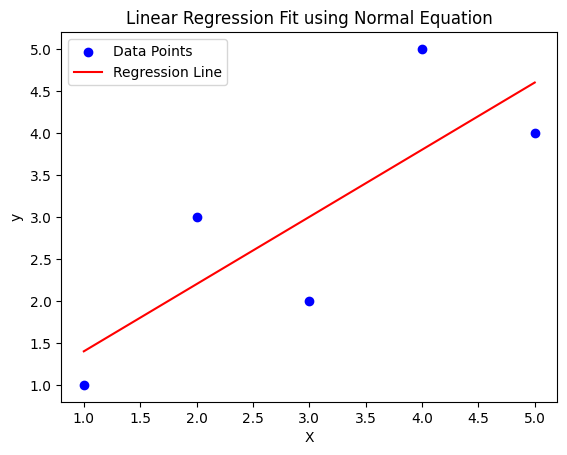

In [20]:
import numpy as np

# Sample data (replace with your actual data)
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 5, 4])

# Add a column of ones to X to account for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X

# Compute the parameters using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the parameters
theta_0, theta_1 = theta_best
print(f"Optimized parameters: theta_0 = {theta_0}, theta_1 = {theta_1}")

# Make predictions using the optimized parameters
y_pred = X_b.dot(theta_best)

# Plotting the data points and the regression line
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit using Normal Equation')
plt.legend()
plt.show()